[![CyVers](https://i.imgur.com/yyhmZET.png)](https://www.cyvers.ai/)

# BlockChain Attack Data Set - Exploratory Data Analysis (EDA)

> Notebook by:
> - Royi Avital Royi@cyverse.com

## Revision History

| Version | Date       | Content / Changes                      |
|---------|------------|----------------------------------------|
| 0.1.000 | 30/06/2022 | First version                          |
|         |            |                                        |

In [1]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Misc
import datetime
import os
from platform import python_version
import random

# EDA Tools
import ppscore as pps #<! See https://github.com/8080labs/ppscore -> pip install git+https://github.com/8080labs/ppscore.git

# Machine Learning

# Ensemble Engines
import lightgbm
import xgboost

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show

# Jupyter
from ipywidgets import interact, Dropdown, Layout

In [2]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

sns.set_theme() #>! Apply SeaBorn theme

In [3]:
#my imports
#warning supression
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd


In [4]:
### feature strings consts
SUM = 'SUM';MEAN = "MEAN"; STD = "STD" ; VAR = 'VAR'; MEDIAN ='MEDIAN' ; COUNT = 'COUNT' ; MIN = 'MIN' ; MAX = 'MAX'
TD_MEAN = "TD_MEAN"; TD_STD = "TD_STD" ;  TD_MEDIAN ='TD_MEDIAN' ;TD_MIN = 'TD_MIN' ; TD_MAX = 'TD_MAX' 

In [5]:
# Constants

DATA_FOLDER_NAME    = 'BlockChainAttacksDataSet'
DATA_FOLDER_PATTERN = 'DataSet'
DATA_FILE_EXT       = 'csv'

PROJECT_DIR_NAME = '_CyVers'
PROJECT_DIR_PATH = os.path.join(os.getcwd()[:os.getcwd().find(PROJECT_DIR_NAME)], PROJECT_DIR_NAME) #>! Pay attention, it will create issues in cases you name the folder `CyVersMe` or anything after `CyVers`

In [6]:
# CyVers Packages
from DataSetsAuxFun import *

In [7]:
# Parameters
dataSetRotoDir = os.path.join(PROJECT_DIR_PATH, DATA_FOLDER_NAME)

# csvFileName = 'Dataset Bitmart.csv'
# csvFileName = 'All.csv'

In [8]:
# Loading / Generating Data
lCsvFile = ExtractCsvFiles(dataSetRotoDir, folderNamePattern = DATA_FOLDER_PATTERN)
print(f'The number of file found: {len(lCsvFile)}')

# dfData = pd.read_csv(os.path.join(DATA_FOLDER_NAME, csvFileName))
dfData = LoadCsvFilesDf(lCsvFile, baseFoldePath = '')
numRows, numCols = dfData.shape

print(f'The number of rows (Samples): {numRows}, The number of columns: {numCols}')

The number of file found: 130
The number of rows (Samples): 758538, The number of columns: 11


In [9]:
# Convert time data into Pandas format
dfData['Transaction Time'] = pd.to_datetime(dfData['Transaction Time'], infer_datetime_format = 'True') #<! Stable time format

In [10]:
# Sort data by transaction date
dfData.sort_values('Transaction Time', inplace = True)

In [11]:
dfData.head(20)

,Transaction ID,Transaction Time,Sender ID,Receiver ID,Amount,Currency,Currency Hash,Currency Type,Amount [USD],Receiver Type,Label
688472,0x4342ed8f0f474d53f9d9eaa7f6eeb77431b0b84fe9a1...,2015-08-12 04:15:29+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x50da60d4da4c04e154ea22af84437e69dd6da401,1.000000,ETH,0x0000000000000000000000000000000000000000,NaN,1.256613,Wallet,0
688471,0x14fc4de9579e21c3532dd80e90578f5b981dbe880d77...,2015-08-12 07:00:01+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x50da60d4da4c04e154ea22af84437e69dd6da401,0.100000,ETH,0x0000000000000000000000000000000000000000,NaN,0.125661,Wallet,0
688470,0x5223e886dab5eeb0dc5a1f8913d39bddce1acb6026fe...,2015-08-12 07:09:07+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x50da60d4da4c04e154ea22af84437e69dd6da401,0.100000,ETH,0x0000000000000000000000000000000000000000,NaN,0.125661,Wallet,0
688469,0x272cb481b829945237b4343e0526df75fc2d472e70df...,2015-08-12 07:15:14+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x50da60d4da4c04e154ea22af84437e69dd6da401,0.100000,ETH,0x0000000000000000000000000000000000000000,NaN,0.125661,Wallet,0
688468,0x33929412bda3d3e6843ff345ea1b3016c29b80adf625...,2015-08-12 07:26:10+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x50da60d4da4c04e154ea22af84437e69dd6da401,0.100000,ETH,0x0000000000000000000000000000000000000000,NaN,0.125661,Wallet,0
688467,0xbe2f6d28c7f42a662a02c7ed5ff3d907b1dac34a44c5...,2015-08-12 07:31:03+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x50da60d4da4c04e154ea22af84437e69dd6da401,0.100000,ETH,0x0000000000000000000000000000000000000000,NaN,0.125661,Wallet,0
688466,0x5c0c51f646fba90d3cea05d98246d77f94613b9ade6b...,2015-08-12 07:34:13+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x50da60d4da4c04e154ea22af84437e69dd6da401,0.100000,ETH,0x0000000000000000000000000000000000000000,NaN,0.125661,Wallet,0
688465,0x2ca36465cca42bc8ba1bd7f8ffbb31c5b8c9f580a91d...,2015-08-12 07:51:32+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x50da60d4da4c04e154ea22af84437e69dd6da401,0.100000,ETH,0x0000000000000000000000000000000000000000,NaN,0.125661,Wallet,0
688464,0xfa0c90c252465725ee8bc13526b2f2749e865f3dfd99...,2015-08-12 08:16:42+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0xa7829b0194bed9ec2478ad0a6fe7c7347f0bea86,0.200000,ETH,0x0000000000000000000000000000000000000000,NaN,0.251323,Wallet,0
688463,0x4fe33f102f67048ff7c05753ff53d4e5f9eae0cf96aa...,2015-08-12 12:23:25+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0xbb925d6943d404dcc76cf6245d383ff759150bf8,7.000000,ETH,0x0000000000000000000000000000000000000000,NaN,8.796292,Wallet,0


In [12]:
dfData.loc[dfData['Label'] == 1, :]

,Transaction ID,Transaction Time,Sender ID,Receiver ID,Amount,Currency,Currency Hash,Currency Type,Amount [USD],Receiver Type,Label
685126,0xc3077f0e80468834495b7fdcdc95121247059bf07beb...,2016-05-09 19:23:22+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x1342a001544b8b7ae4a5d374e33114c66d78bd5f,9950.0,ETH,0x0000000000000000000000000000000000000000,NaN,9.306510e+04,Wallet,1
685125,0x8ec6e4b5eb0c5fb52a8286905323c15cbfe691be8dd5...,2016-05-09 19:24:39+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x1342a001544b8b7ae4a5d374e33114c66d78bd5f,0.8,ETH,0x0000000000000000000000000000000000000000,NaN,7.482621e+00,Wallet,1
685124,0xb9e83c234d9fce5030f409949484977ab5d482dc164a...,2016-05-09 21:31:52+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x04786aada9deea2150deab7b3b8911c309f5ed90,9999.5,ETH,0x0000000000000000000000000000000000000000,NaN,9.352809e+04,Wallet,1
685123,0x6981d0dc2e85499797e3d39eafdf032167d783601b53...,2016-05-09 22:00:35+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0xd4914762f9bd566bd0882b71af5439c0476d2ff6,9999.5,ETH,0x0000000000000000000000000000000000000000,NaN,9.352809e+04,Wallet,1
685121,0xac97b19a34cb77786538ce29850991ace625b2b82561...,2016-05-09 22:33:49+00:00,0x40b9b889a21ff1534d018d71dc406122ebcf3f5a,0x1342a001544b8b7ae4a5d374e33114c66d78bd5f,5326.0,ETH,0x0000000000000000000000000000000000000000,NaN,4.981555e+04,Wallet,1
...,...,...,...,...,...,...,...,...,...,...,...
364302,0x8ecac8544898d2b2d0941b8e39458bf4c8ccda1b668d...,2022-06-23 11:17:38+00:00,0x2dccdb493827e15a5dc8f8b72147e6c4a5620857,0x0d043128146654c7683fbf30ac98d7b2285ded00,84620000.0,AAG,0x5ba19d656b65f1684cfea4af428c23b9f3628f97,ERC20,1.068888e+06,Wallet,1
364301,0x4a59c3e5c48ae796fe4482681c3da00c15b816d1af9d...,2022-06-23 11:18:54+00:00,0x2dccdb493827e15a5dc8f8b72147e6c4a5620857,0x0d043128146654c7683fbf30ac98d7b2285ded00,110000.0,FXS,0x3432b6a60d23ca0dfca7761b7ab56459d9c964d0,ERC20,5.678140e+05,Wallet,1
364300,0x75eeae4776e453d2b43ce130007820d70898bcd4bd6f...,2022-06-23 11:19:13+00:00,0x2dccdb493827e15a5dc8f8b72147e6c4a5620857,0x0d043128146654c7683fbf30ac98d7b2285ded00,415000.0,SUSHI,0x6b3595068778dd592e39a122f4f5a5cf09c90fe2,ERC20,5.088535e+05,Wallet,1
364299,0xc1c554988aab1ea3bc74f8b87fb2c256ffd9e3bcadaa...,2022-06-23 11:20:14+00:00,0x2dccdb493827e15a5dc8f8b72147e6c4a5620857,0x0d043128146654c7683fbf30ac98d7b2285ded00,990.0,AAVE,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,ERC20,6.558570e+04,Wallet,1


In [13]:
dfData['Label'].value_counts()

0    756717
1      1821
Name: Label, dtype: int64

In [14]:
dsValidTrns = ((dfData['Amount [USD]'] == 0) | (dfData['Amount [USD]'] == np.nan))
dsValidTrns

688472    False
688471    False
688470    False
688469    False
688468    False
          ...  
688625    False
688624    False
688623    False
688622    False
688621    False
Name: Amount [USD], Length: 758538, dtype: bool

In [15]:
len(dfData['Sender ID'].unique())

127

In [16]:
dsValidTrns.index[dsValidTrns]

Int64Index([241219, 241200, 241206, 241205, 241204, 241203, 241202, 241201,
            241199, 241183,
            ...
            161756, 161752, 161751, 161746, 161745, 161731, 161695, 161681,
            161662, 364474],
           dtype='int64', length=31147)

In [17]:
dfData.drop(dsValidTrns.index[dsValidTrns], inplace = True)

In [18]:
numRows, numCols = dfData.shape

print(f'The number of rows (Samples): {numRows}, The number of columns: {numCols}')

The number of rows (Samples): 727391, The number of columns: 11


In [19]:
dfData['Label'].value_counts()

0    725632
1      1759
Name: Label, dtype: int64

In [20]:
#!!!!! It seems the constructore is only called at first call (Lazy) and not on the form of the DF
#!!!!! Hence once it is called, no rows can be removed or any change of the index!
dfData.GrpBySender.numGrps #<! Check if the extension works

#TODO: Add methods for feature extraction to the extending class

127

In [21]:
lLabelIdx = dfData.GrpBySender.lLabelIdx

In [22]:
dfData.GrpBySender.lSubGrpUsrLabelIdx[6][3] #<! The 6th Sender Group, 3rd Group of User in the 6th...

IndexError: list index out of range

In [ ]:
len(lLabelIdx[0])

In [ ]:
dsTotalSentValue = dfData.GrpBySender.TotalSentValue()

In [ ]:
dsTotalSentValue.head(10)

In [ ]:
len(dfData['Sender ID'].unique())

In [ ]:
dfData.info()

In [ ]:
dfData.describe()

## Feature Engineering

This section adds features and engineers them.  
Most features work on the `Sender ID` group.


The features are:
     
 1.  time related: day/night, week day -weekend, hours
 2.  number of lone attackers in a dataset(labeled as 1, appears only once globaly or locally)

Remarks:

 *  Features x-y are time / frequency related.
 *  Features z-t are trasnaction realted.


In [26]:
# Pre Process (Anton)
gbs = GrpBySender(dfData)



In [27]:
# Pre Process (Royi)

In [28]:
# Features - Amount Based (Anton)
'''    TYPE_SUM     TYPE_MEAN            TYPE_STD              TYPE_VAR                    TYPE_MEDIAN           TYPE_COUNT                  TYPE_MIN              TYPE_MAX                    '''
sum_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_SUM)
mean_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_MEAN)
std_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_STD)
var_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_VAR)
median_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_MEDIAN)
count_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_COUNT)
min_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_MIN)
max_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_MAX)
dfData[SUM] = sum_s
dfData[MEAN] = mean_s
dfData[STD] = std_s
dfData[VAR] = var_s
dfData[MEDIAN] = median_s
dfData[COUNT] = count_s
dfData[MIN] = min_s
dfData[MAX] = max_s

In [29]:
# Features - Time Based (Anton)
'TYPE_TIME_DIFF_MEAN      TYPE_TIME_DIFF_STD TYPE_TIME_DIFF_MEDIAN  TYPE_TIME_DIFF_MIN      TYPE_TIME_DIFF_MAX'      
td_mean_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_MEAN)
td_std_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_STD)
td_median_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_MEDIAN)
td_min_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_MIN)
td_max_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_MAX)
dfData[TD_MEAN] = td_mean_s
dfData[TD_STD] = td_std_s
dfData[TD_MEDIAN] = td_median_s
dfData[TD_MIN] = td_min_s
dfData[TD_MAX] = td_max_s

In [30]:
# Features - Amount Based (Royi)

In [31]:
# Features - Amount Based (Anton)

In [ ]:
# Feature PPS (Anton)
lSlctdFeatures  = ['Amount', 'Currency', 'Currency Type', 'Amount [USD]', 'SUM', 'MEAN', 'STD', 'VAR', 'MEDIAN','COUNT', 'MIN', 'MAX', 'TD_MEAN', 'TD_STD', 'TD_MEDIAN', 'TD_MIN','TD_MAX']
numFeatures     = len(lSlctdFeatures)
mPPS = pps.matrix(dfData[lSlctdFeatures + ['Label']], **{'cross_validation': 20, 'random_seed': 1234})[['x', 'y', 'ppscore']].pivot(columns = 'x', index = 'y', values = 'ppscore')
# Visualization of PPS
hF, hA = plt.subplots(figsize = (30, 30))
sns.heatmap(mPPS, annot = True, fmt = '.2f', cmap = plt.get_cmap('coolwarm'), cbar = False, vmin = 0, vmax = 1, ax = hA) 

plt.setp(hA.get_xticklabels(), ha = "center", rotation = 45)
plt.setp(hA.get_yticklabels(), rotation = 'horizontal')
hA.set_title('Predictive Power Score (PPS)')
#valA = pps.score(dfData, 'MEAN', 'Label') 
#valA






In [39]:
####################### create inputs for ML algos:
dfData.fillna(0, inplace=True)
X = dfData[dfData.columns[~dfData.columns.isin(['Transaction ID', 'Transaction Time', 'Sender ID', 'Receiver ID', 'Currency', 'Currency Hash', 'Currency Type', 'Receiver Type','tx_hash','Label'])]].to_numpy()
Y = dfData['Label'].to_numpy()
#Y = Y.reshape(-1,1)
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Features Visualization

fsfssfd

In [ ]:
# Visualize Data & Features (Royi)

# Dimensionality Reduction

Using LDA, QDA and T-SNE

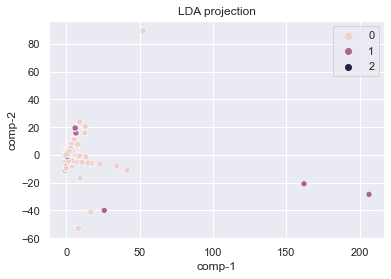

In [40]:
# LDA & QDA (Anton)
# LDA & QDA (Anton)

################################################################
### Straight forward dimensionality reduction using LDA is very limited as n_components cannot be larger than min(n_features, n_classes - 1)
### consequently in a situation of binary classification we face the problem that all the features have to collapse to only one.
### for example :
#lda = LDA(n_components=2)
#X_lda = lda.fit_transform(X, Y)
### will lead to a crash

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, Y) # X_lda becomes 1-dimensional



##### illustrative case of LDA dimensionality reduction usage, i artificially add 3rd class, corrupting original data, but it gives a chance to better see the resulting data
def d2_plot(x_lda,y,x):
    
    df = pd.DataFrame()
    df["y"] = y
    df["comp-1"] = x_lda[:,0]
    df["comp-2"] = x_lda[:,1]

    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    data=df).set(title="LDA projection")
x = X_scaled ; y = Y

#number_of_rows = x.shape[0]
#random_indices = np.random.choice(number_of_rows, size=100000, replace=False)
#x = x[random_indices, :]; #y = y[random_indices]
y[-7:-1] = 2 
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit(x, y).transform(x)
d2_plot(x_lda,y,x)


In [ ]:
# T-SNE (Anton)
#### takes forever............. actually 37 mins :)
x = X_scaled ; y = Y

# use below lines for quick try
#number_of_rows = x.shape[0]
#random_indices = np.random.choice(number_of_rows, size=5000, replace=False)
#x = x[random_indices, :]
#y = y[random_indices]



tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                #palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection")
